# Analysis of acquisition noise

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from spas import read_metadata

In [2]:
file = open('./17-05-2021-noise_model/times.txt', 'r')
times = file.read().splitlines()
times = [int(float(time)) for time in times]
file.close()

print(f'Integration times acquired (in ms) : {times}')

Integration times acquired (in ms) : [1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32]


## Reading acquired data and metadata

Acquired data description:

* spectral_data_white:
    - Source: White lamp (LED) - Thorlabs LIUCWHA/M00441662
    - Filter: Optical density of 1.0
    - Patterns: 10k white patterns
    
* spectral_data_black1:
    - Source: None
    - Filter: None
    - Patterns: 10k black patterns
    - Description: Dark noise acquisition using a box cover over the acquisition system
   
* spectral_data_black2:
    - Source: None
    - Filter: None
    - Patterns: 10k black patterns
    - Description: Dark noise acquisition using a cover directly on the spectrometer's input

In [3]:
spectral_data_black2 = []

file = np.load(f'./17-05-2021-noise_model/raw_data.npz')
spectral_data_white = file['spectral_data_white']
for time in times:
    file = np.load(f'./17-05-2021-noise_model2/black-acq-{time}_spectraldata.npz')
    spectral_data_black2.append(file['spectral_data'])

In [4]:
_,acquisition_parameters,_,_ = read_metadata('./17-05-2021-noise_model2/black-acq-1_metadata.json')
wavelengths = np.asarray(acquisition_parameters.wavelengths)
print(f'{len(wavelengths)} wavelengths acquired in the range: {wavelengths[0]} - {wavelengths[-1]} nm')

2048 wavelengths acquired in the range: 514.7382 - 750.2672 nm


## Calculating statistics

In [5]:
spectral_data_black2 = np.asarray(spectral_data_black2, dtype=np.float32)
mean_black2 = np.mean(spectral_data_black2, axis=1)
var_black2 = np.var(spectral_data_black2, axis=1)

spectral_data_white = np.asarray(spectral_data_white, dtype=np.float32)
mean_white = np.mean(spectral_data_white, axis=1)
var_white = np.var(spectral_data_white, axis=1)

## Comparing the mean for each dataset 

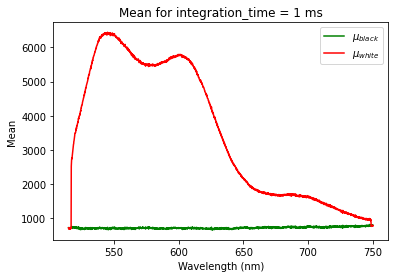

In [6]:
plt.figure()
plt.plot(wavelengths, mean_black2[0,:], 'g')
plt.plot(wavelengths, mean_white[0,:], 'r')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Mean')
plt.title(f'Mean for integration_time = {times[0]} ms')
plt.legend(['$µ_{black}$','$µ_{white}$'])

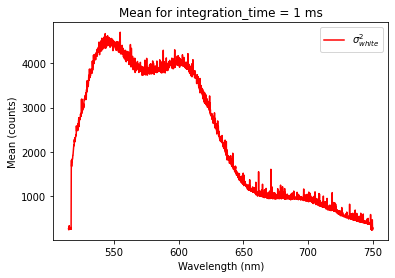

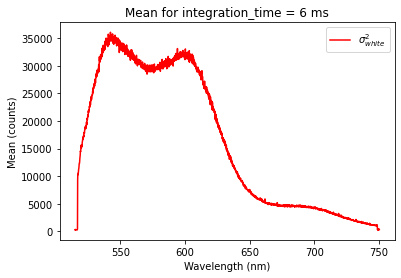

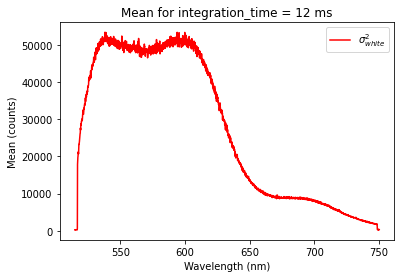

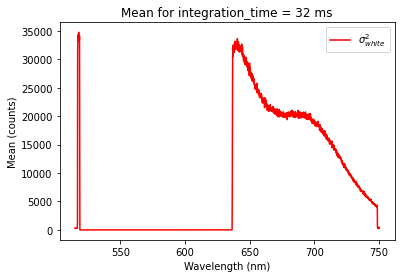

In [7]:
time_indeces = [0, 3, 6, 16]

for time_index in time_indeces:
    
    plt.figure()
    plt.plot(wavelengths, var_white[time_index,:], 'r')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Mean (counts)')
    plt.title(f'Mean for integration_time = {times[time_index]} ms')
    plt.legend(['$\sigma_{white}^{2}$'])

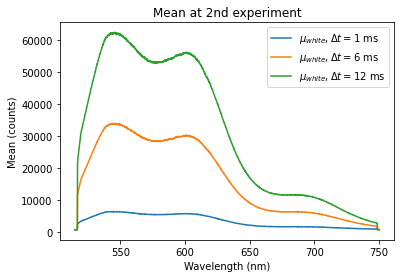

In [8]:
plt.figure()
plt.plot(wavelengths, mean_white[time_indeces[0],:], label='$\mu_{white}, \Delta t = $'f'{times[time_indeces[0]]} ms')
plt.plot(wavelengths, mean_white[time_indeces[1],:], label='$\mu_{white}, \Delta t = $'f'{times[time_indeces[1]]} ms')
plt.plot(wavelengths, mean_white[time_indeces[2],:], label='$\mu_{white}, \Delta t = $'f'{times[time_indeces[2]]} ms')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Mean (counts)')
plt.title(f'Mean at 2nd experiment')
plt.legend()

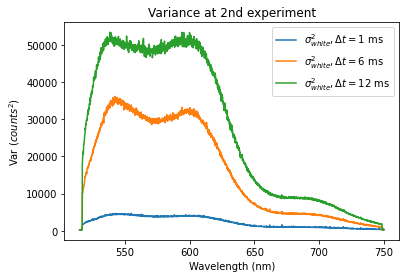

In [9]:
plt.figure()
plt.plot(wavelengths, var_white[time_indeces[0],:], label='$\sigma_{white}^2, \Delta t = $'f'{times[time_indeces[0]]} ms')
plt.plot(wavelengths, var_white[time_indeces[1],:], label='$\sigma_{white}^2, \Delta t = $'f'{times[time_indeces[1]]} ms')
plt.plot(wavelengths, var_white[time_indeces[2],:], label='$\sigma_{white}^2, \Delta t = $'f'{times[time_indeces[2]]} ms')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Var ($counts^2$)')
plt.title(f'Variance at 2nd experiment')
plt.legend()

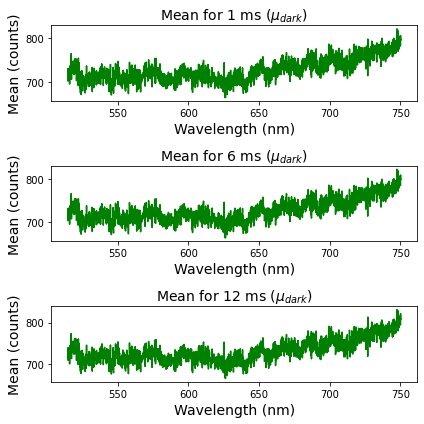

In [10]:
time_indeces = [0, 3, 6]

fig, axs = plt.subplots(len(time_indeces), 1, figsize=(6,6))

for plot_index, time_index in enumerate(time_indeces):    
    axs[plot_index].plot(wavelengths, mean_black2[time_index,:], 'g')
    axs[plot_index].set_xlabel('Wavelength (nm)', fontsize=14)
    axs[plot_index].set_ylabel('Mean (counts)', fontsize=14)
    axs[plot_index].set_title(f'Mean for {times[time_index]} ms'' ($µ_{dark}$)', fontsize=14)

fig.tight_layout()

## Comparing the variance for each dataset

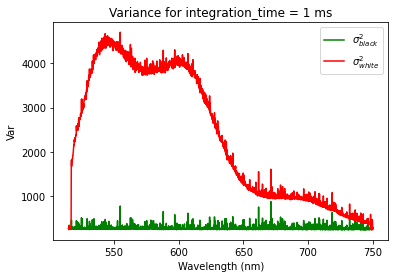

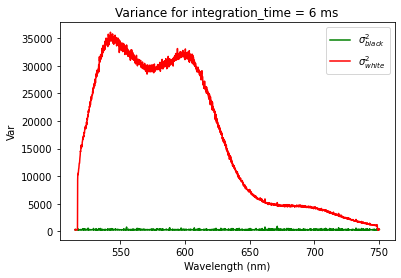

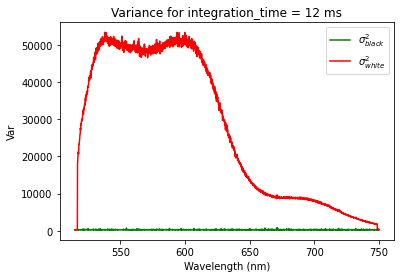

In [11]:
for time_index in time_indeces:
    
    plt.figure()
    plt.plot(wavelengths, var_black2[time_index,:], 'g')
    plt.plot(wavelengths, var_white[time_index,:], 'r')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Var')
    plt.title(f'Variance for integration_time = {times[time_index]} ms')
    plt.legend(['$\sigma_{black}^{2}$','$\sigma_{white}^{2}$'])

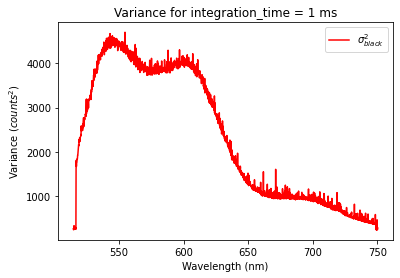

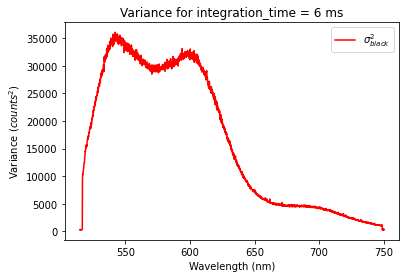

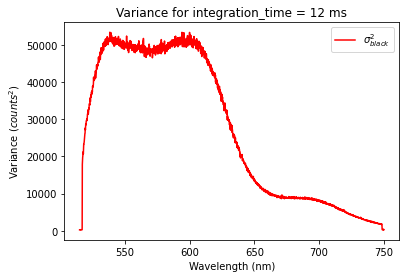

In [12]:
for time_index in time_indeces:
    
    plt.figure()
    plt.plot(wavelengths, var_white[time_index,:], 'r')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Variance ($counts^2$)')
    plt.title(f'Variance for integration_time = {times[time_index]} ms')
    plt.legend(['$\sigma_{black}^{2}$','$\sigma_{white}^{2}$'])

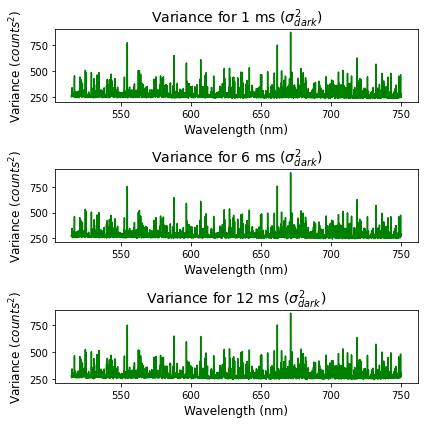

In [13]:
time_indeces = [0, 3, 6]

fig, axs = plt.subplots(len(time_indeces), 1, figsize=(6,6))

for plot_index, time_index in enumerate(time_indeces):
    axs[plot_index].plot(wavelengths, var_black2[time_index,:], 'g')
    axs[plot_index].set_xlabel('Wavelength (nm)', fontsize=12)
    axs[plot_index].set_ylabel('Variance ($counts^2$)', fontsize=12)
    axs[plot_index].set_title(f'Variance for {times[time_index]} ms'' ($\sigma^{2}_{dark}$)', fontsize=14)

fig.tight_layout()

### Using only the second "dark" acquisition for further analysis

In [14]:
spectral_data_black = spectral_data_black2
mean_black = mean_black2
var_black = var_black2

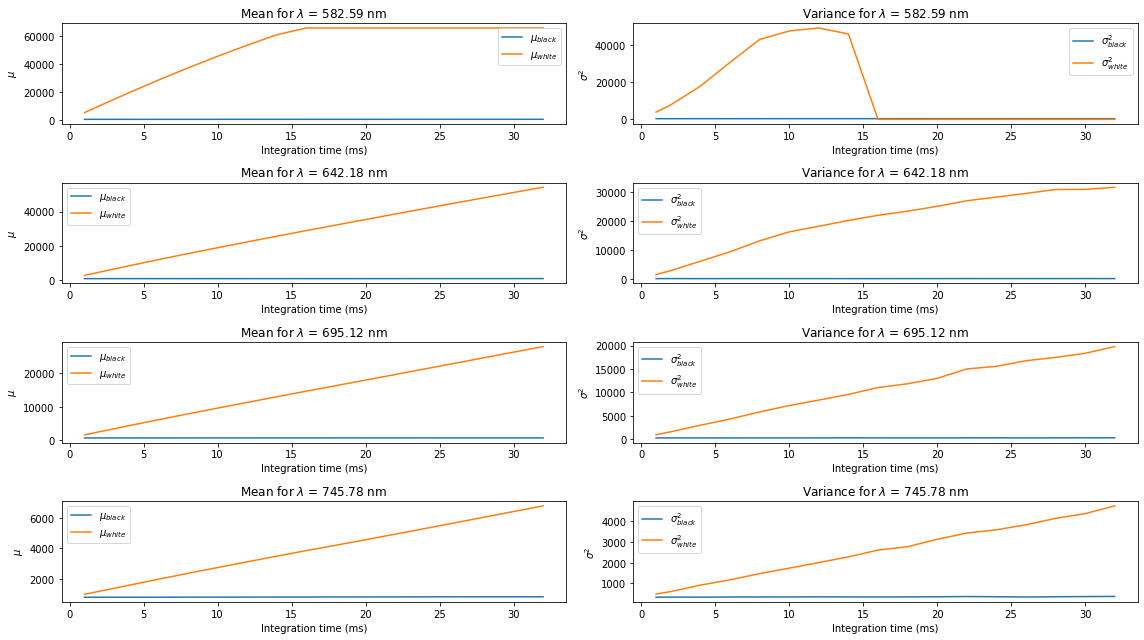

In [15]:
lambda_indeces = [528, 1024, 1500, 2000]

fig, axs = plt.subplots(len(lambda_indeces), 2, figsize=(16, 9))

for plot_index, lambda_index in enumerate(lambda_indeces):
    
    axs[plot_index, 0].plot(times, mean_black[:,lambda_index], label='$µ_{black}$')
    axs[plot_index, 0].plot(times, mean_white[:,lambda_index], label='$µ_{white}$')
    axs[plot_index, 0].set_xlabel('Integration time (ms)')
    axs[plot_index, 0].set_ylabel('$µ$')
    axs[plot_index, 0].set_title(f'Mean for $\lambda$ = {wavelengths[lambda_index]:.2f} nm')
    axs[plot_index, 0].legend()

    axs[plot_index, 1].plot(times, var_black[:,lambda_index], label='$\sigma_{black}^{2}$')
    axs[plot_index, 1].plot(times, var_white[:,lambda_index], label='$\sigma_{white}^{2}$')
    axs[plot_index, 1].set_xlabel('Integration time (ms)')
    axs[plot_index, 1].set_ylabel('$\sigma^{2}$')
    axs[plot_index, 1].set_title(f'Variance for $\lambda$ = {wavelengths[lambda_index]:.2f} nm')
    axs[plot_index, 1].legend()

fig.tight_layout()

## Dealing with saturation

### Checking for saturation

In [16]:
no_saturation = []

for i in range(len(times)):
    # Saturation occurs if more than 65535 photons are detected
    if np.any(np.greater_equal(spectral_data_white[i,:,:], 65535.0)):
        break
    else:
        no_saturation.append(i)
        
print(f'Saturation detected for integration times above {times[i-1]} ms')

times = [times[i] for i in no_saturation]

Saturation detected for integration times above 12 ms


### Recalculating statistics without saturation

In [17]:
mean_white = np.mean(spectral_data_white[no_saturation,:,:], axis=1)
var_white = np.var(spectral_data_white[no_saturation,:,:], axis=1)
mean_black = np.mean(spectral_data_black2[no_saturation,:,:], axis=1)
var_black = np.var(spectral_data_black2[no_saturation,:,:], axis=1)

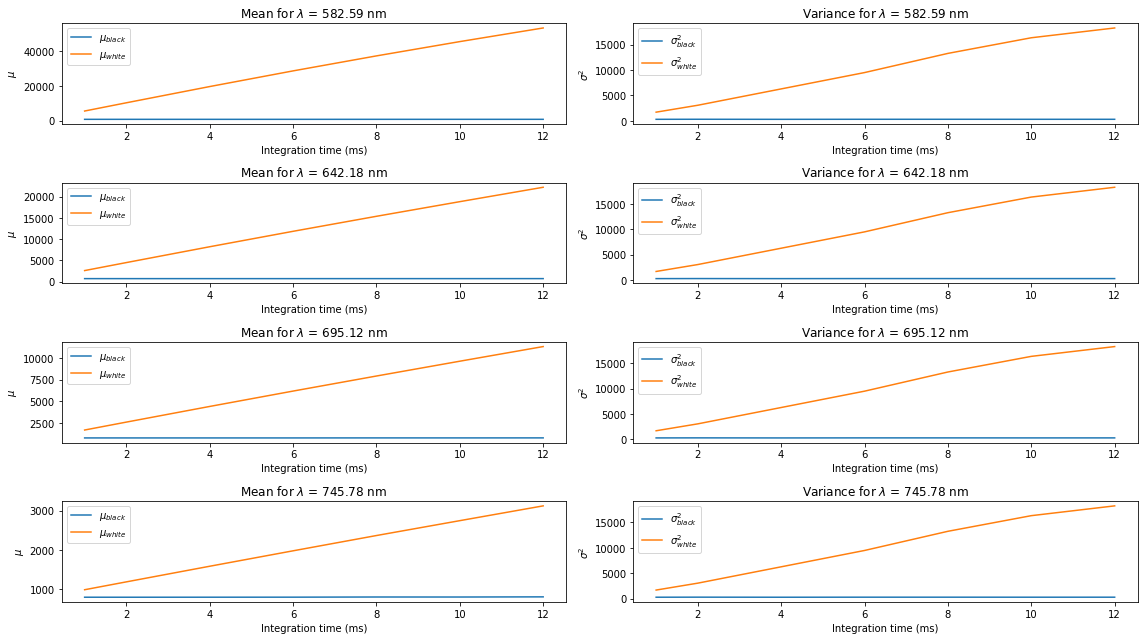

In [18]:
lambda_indeces = [528, 1024, 1500, 2000]

fig, axs = plt.subplots(len(lambda_indeces), 2, figsize=(16, 9))

for plot_index, lambda_index in enumerate(lambda_indeces):

    axs[plot_index, 0].plot(times, mean_black[:,lambda_index], label='$µ_{black}$')
    axs[plot_index, 0].plot(times, mean_white[:,lambda_index], label='$µ_{white}$')
    axs[plot_index, 0].set_xlabel('Integration time (ms)')
    axs[plot_index, 0].set_ylabel('$µ$')
    axs[plot_index, 0].set_title(f'Mean for $\lambda$ = {wavelengths[lambda_index]:.2f} nm')
    axs[plot_index, 0].legend()

    axs[plot_index, 1].plot(times, var_black[:,1024], label='$\sigma_{black}^{2}$')
    axs[plot_index, 1].plot(times, var_white[:,1024], label='$\sigma_{white}^{2}$')
    axs[plot_index, 1].set_xlabel('Integration time (ms)')
    axs[plot_index, 1].set_ylabel('$\sigma^{2}$')
    axs[plot_index, 1].set_title(f'Variance for $\lambda$ = {wavelengths[lambda_index]:.2f} nm')
    axs[plot_index, 1].legend()
    
fig.tight_layout()

## Poisson noise analysis

In [19]:
mean_poisson = mean_white - mean_black
var_poisson = var_white - var_black

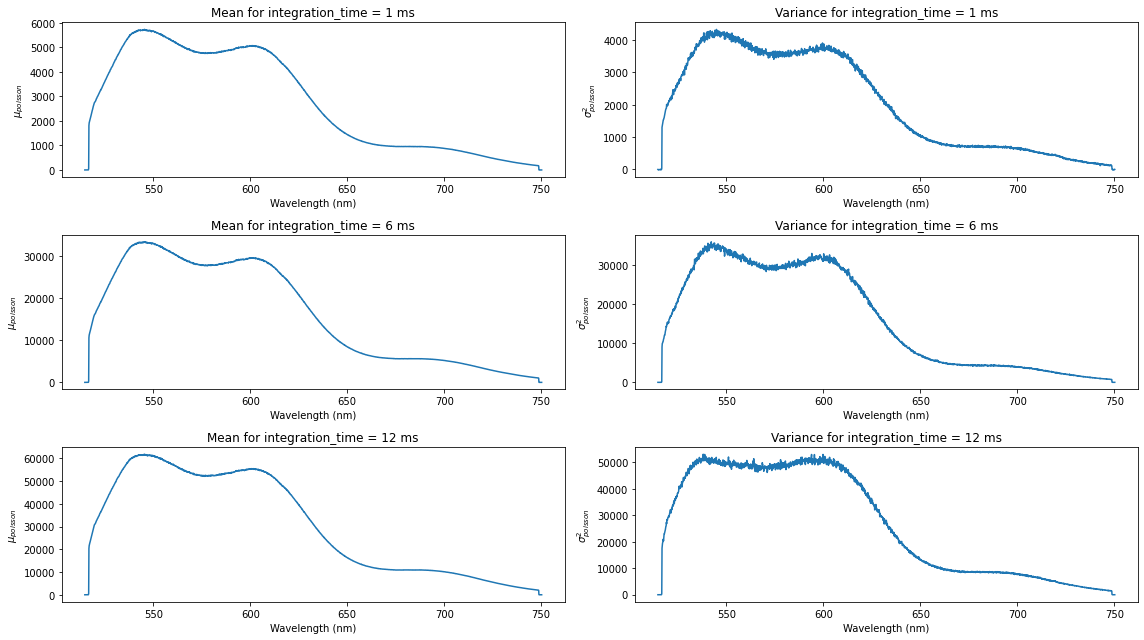

In [20]:
time_indeces = [0, 3, 6]

fig, axs = plt.subplots(len(time_indeces), 2, figsize=(16, 9))

for plot_index, time_index in enumerate(time_indeces):

    axs[plot_index, 0].plot(wavelengths, mean_poisson[time_index,:])
    axs[plot_index, 0].set_xlabel('Wavelength (nm)')
    axs[plot_index, 0].set_ylabel('$µ_{poisson}$')
    axs[plot_index, 0].set_title(f'Mean for integration_time = {times[time_index]} ms')

    axs[plot_index, 1].plot(wavelengths, var_poisson[time_index,:])
    axs[plot_index, 1].set_xlabel('Wavelength (nm)')
    axs[plot_index, 1].set_ylabel('$\sigma^{2}_{poisson}$')
    axs[plot_index, 1].set_title(f'Variance for integration_time = {times[time_index]} ms')
    
fig.tight_layout()

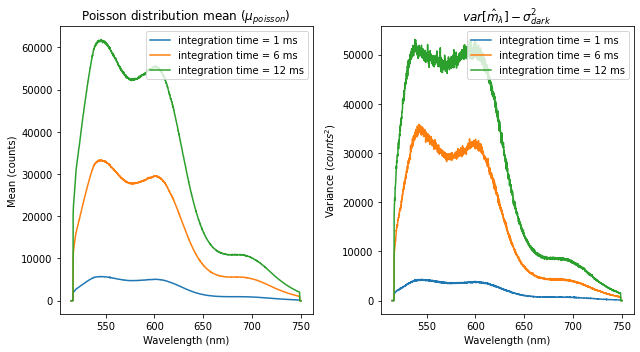

In [21]:
time_indeces = [0, 3, 6]

fig, axs = plt.subplots(1, 2, figsize=(9, 5))

axs[0].plot(wavelengths, mean_poisson[0,:], label=f'integration time = {times[0]} ms')
axs[0].plot(wavelengths, mean_poisson[3,:], label=f'integration time = {times[3]} ms')
axs[0].plot(wavelengths, mean_poisson[6,:], label=f'integration time = {times[6]} ms')
axs[0].set_xlabel('Wavelength (nm)')
axs[0].set_ylabel('Mean (counts)')
axs[0].legend()
axs[0].set_title('Poisson distribution mean ($\mu_{poisson}$)')

axs[1].plot(wavelengths, var_poisson[0,:], label=f'integration time = {times[0]} ms')
axs[1].plot(wavelengths, var_poisson[3,:], label=f'integration time = {times[3]} ms')
axs[1].plot(wavelengths, var_poisson[6,:], label=f'integration time = {times[6]} ms')
axs[1].set_xlabel('Wavelength (nm)')
axs[1].set_ylabel('Variance ($counts^2$)')
axs[1].legend()
axs[1].set_title('$var[\hat{m}_{\lambda}] - \sigma_{dark}^2$')

fig.tight_layout()

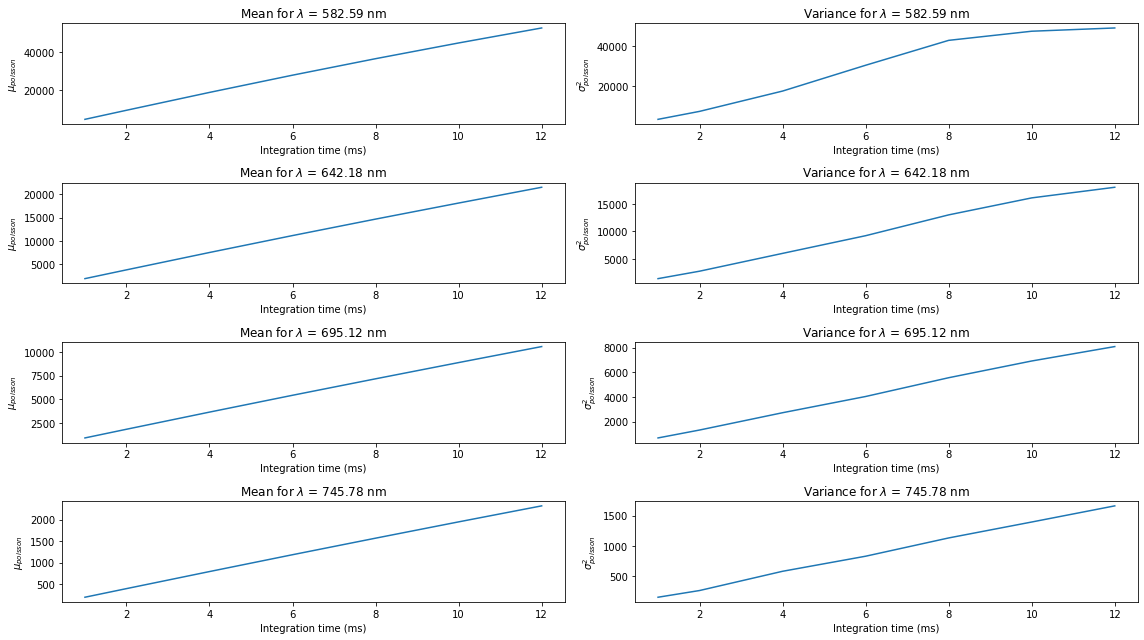

In [22]:
lambda_indeces = [528, 1024, 1500, 2000]

fig, axs = plt.subplots(len(lambda_indeces), 2, figsize=(16, 9))

for plot_index, lambda_index in enumerate(lambda_indeces):

    axs[plot_index, 0].plot(times, mean_poisson[:,lambda_index])
    axs[plot_index, 0].set_xlabel('Integration time (ms)')
    axs[plot_index, 0].set_ylabel('$µ_{poisson}$')
    axs[plot_index, 0].set_title(f'Mean for $\lambda$ = {wavelengths[lambda_index]:.2f} nm')

    axs[plot_index, 1].plot(times, var_poisson[:,lambda_index])
    axs[plot_index, 1].set_xlabel('Integration time (ms)')
    axs[plot_index, 1].set_ylabel('$\sigma^{2}_{poisson}$')
    axs[plot_index, 1].set_title(f'Variance for $\lambda$ = {wavelengths[lambda_index]:.2f} nm')
    
fig.tight_layout()

## Analysis of K

## Fitting K for each wavelength

In [23]:
coeff1 = np.zeros((mean_poisson.shape[1]))
residuals = np.zeros((mean_poisson.shape[1]))

for index in range(mean_poisson.shape[1]):
    
    x = mean_poisson[:,index]
    A = x[:,np.newaxis]
    y = var_poisson[:,index]
    
    # Linear fit
    coeff1[index], residual,_,_ = np.linalg.lstsq(A, y)
    
    # Calculating the coefficient of determination
    residuals[index] = 1 - residual / sum((y - y.mean())**2) 
    
np.savetxt('./fit_model.txt', coeff1)

<ipython-input-23-ff197a648f4c>:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coeff1[index], residual,_,_ = np.linalg.lstsq(A, y)


## Saving results

In [24]:
np.savez('./fit_model2.npz', mu=mean_black[0,:], sigma=np.sqrt(var_black[0,:]), k=coeff1)

### Visualizing K fit for a wavelegth

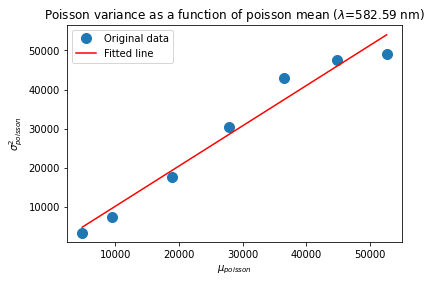

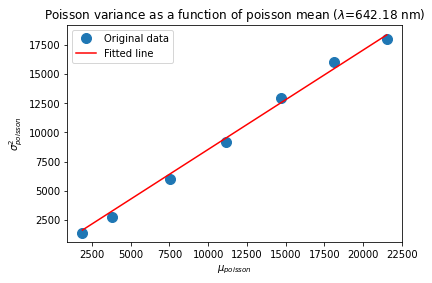

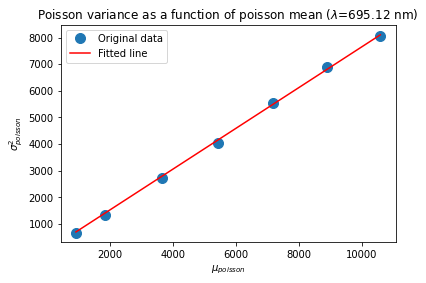

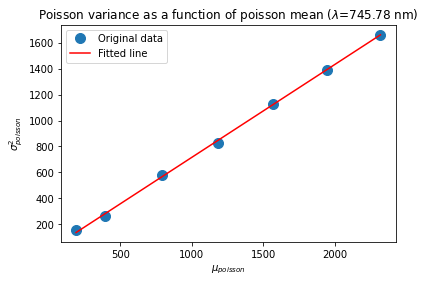

In [25]:
lambda_indeces = [528, 1024, 1500, 2000]

for lambda_index in lambda_indeces:
    plt.figure()
    plt.plot(mean_poisson[:,lambda_index], var_poisson[:,lambda_index], 'o', label='Original data', markersize=10)
    plt.plot(mean_poisson[:,lambda_index], coeff1[lambda_index]*mean_poisson[:,lambda_index] + 0, 'r', label='Fitted line')
    plt.xlabel('$µ_{poisson}$')
    plt.ylabel('$\sigma^{2}_{poisson}$')
    plt.title(f'Poisson variance as a function of poisson mean ($\lambda$={wavelengths[lambda_index]:.2f} nm)')
    plt.legend()

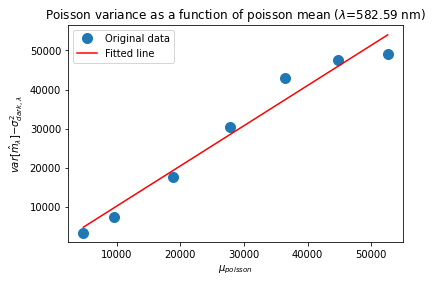

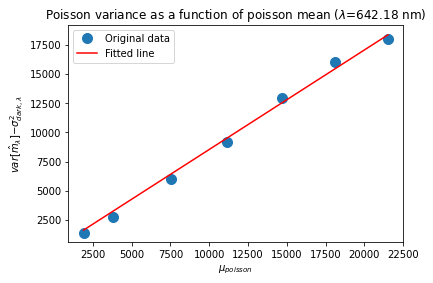

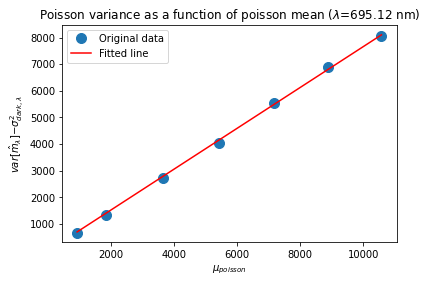

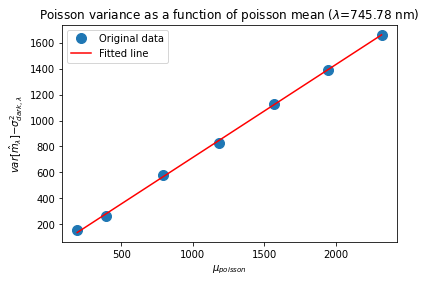

In [35]:
lambda_indeces = [528, 1024, 1500, 2000]

for lambda_index in lambda_indeces:
    plt.figure()
    plt.plot(mean_poisson[:,lambda_index], var_poisson[:,lambda_index], 'o', label='Original data', markersize=10)
    plt.plot(mean_poisson[:,lambda_index], coeff1[lambda_index]*mean_poisson[:,lambda_index] + 0, 'r', label='Fitted line')
    plt.xlabel('$µ_{poisson}$')
    plt.ylabel('$var[\hat{m}_{\lambda}]$''$- \sigma_{dark, \lambda}^2$')
    plt.title(f'Poisson variance as a function of poisson mean ($\lambda$={wavelengths[lambda_index]:.2f} nm)')
    plt.legend()

### Looking for wavelengths whose K² is negative 

In [27]:
positive_k2, = np.where(coeff1 >= 0)

print(f'For the following wavelengths, K² is negative:\n')
for index, wavelength in enumerate(wavelengths):
    if not index in positive_k2:
        print(f'wavelengths[{index}] = {wavelength:.2f} nm')

For the following wavelengths, K² is negative:



### Plotting K as a function of wavelength

Text(0.5, 1.0, 'K as a function of wavelength')

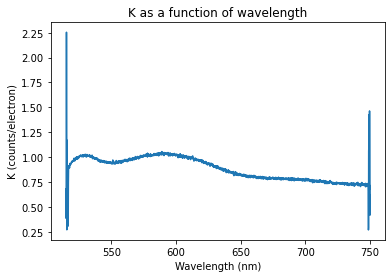

In [28]:
plt.figure()
plt.plot(wavelengths[positive_k2], coeff1[positive_k2])
plt.xlabel('Wavelength (nm)')
plt.ylabel('K (counts/electron)')
plt.title('K as a function of wavelength')

### Superposing K and the illumition curve

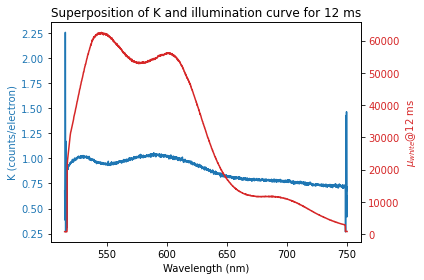

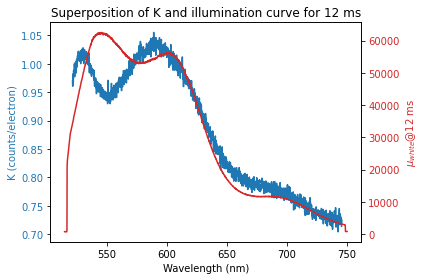

In [29]:
fig, ax1 = plt.subplots()

ax1.set_title('Superposition of K and illumination curve for 12 ms')

color = 'tab:blue'
ax1.set_xlabel('Wavelength (nm)')
ax1.set_ylabel('K (counts/electron)',  color=color)
ax1.plot(wavelengths[positive_k2], coeff1[positive_k2], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('$µ_{white}$'f'@{times[-1]} ms', color=color)
ax2.plot(wavelengths, mean_white[-1,:], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()


fig2, ax3 = plt.subplots()

ax3.set_title('Superposition of K and illumination curve for 12 ms')

color = 'tab:blue'
ax3.set_xlabel('Wavelength (nm)')
ax3.set_ylabel('K (counts/electron)',  color=color)
ax3.plot(wavelengths[50:2000], coeff1[50:2000], color=color)
ax3.tick_params(axis='y', labelcolor=color)

ax4 = ax3.twinx()

color = 'tab:red'
ax4.set_ylabel('$µ_{white}$'f'@{times[-1]} ms', color=color)
ax4.plot(wavelengths, mean_white[-1,:], color=color)
ax4.tick_params(axis='y', labelcolor=color)

fig2.tight_layout()

### Linear fit residuals

Text(0.5, 1.0, 'Best coefficients of determination from linear fit ($R^2 > 0.9$)')

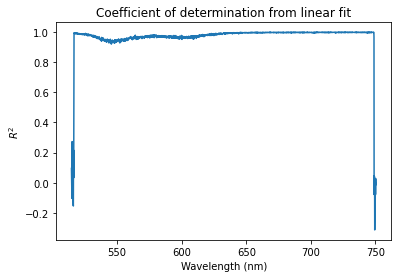

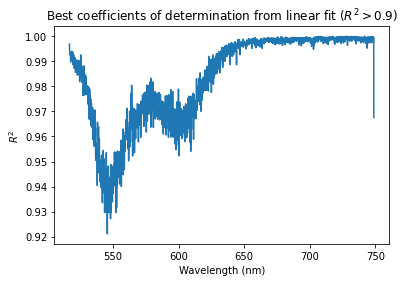

In [30]:
plt.figure()
plt.plot(wavelengths, residuals)
plt.xlabel('Wavelength (nm)')
plt.ylabel('$R^{2}$')
plt.title('Coefficient of determination from linear fit')

indeces = np.where(residuals >= 0.9)
plt.figure()
plt.plot(wavelengths[indeces], residuals[indeces])
plt.xlabel('Wavelength (nm)')
plt.ylabel('$R^{2}$')
plt.title('Best coefficients of determination from linear fit ($R^2 > 0.9$)')

### Comparing residuals and K

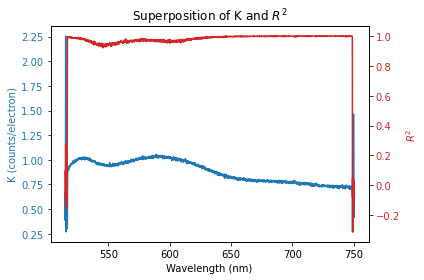

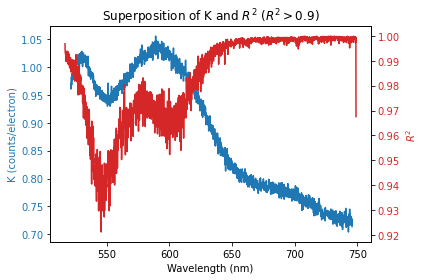

In [31]:
fig, ax1 = plt.subplots()

ax1.set_title('Superposition of K and $R^2$')

color = 'tab:blue'
ax1.set_xlabel('Wavelength (nm)')
ax1.set_ylabel('K (counts/electron)',  color=color)
ax1.plot(wavelengths[positive_k2], coeff1[positive_k2], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('$R^2$', color=color)
ax2.plot(wavelengths, residuals[:], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()


fig2, ax3 = plt.subplots()

ax3.set_title('Superposition of K and $R^2$ ($R^2 > 0.9$)')

color = 'tab:blue'
ax3.set_xlabel('Wavelength (nm)')
ax3.set_ylabel('K (counts/electron)',  color=color)
ax3.plot(wavelengths[50:2000], coeff1[50:2000], color=color)
ax3.tick_params(axis='y', labelcolor=color)

ax4 = ax3.twinx()

indeces = np.where(residuals >= 0.9)
color = 'tab:red'
ax4.set_ylabel('$R^2$', color=color)
ax4.plot(wavelengths[indeces], residuals[indeces], color=color)
ax4.tick_params(axis='y', labelcolor=color)

fig2.tight_layout()

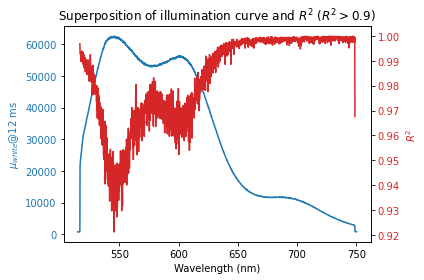

In [32]:
fig2, ax3 = plt.subplots()

ax3.set_title('Superposition of illumination curve and $R^2$ ($R^2 > 0.9$)')

color = 'tab:blue'
ax3.set_xlabel('Wavelength (nm)')
ax3.set_ylabel('$µ_{white}$'f'@{times[-1]} ms',  color=color)
ax3.plot(wavelengths, mean_white[-1,:], color=color)
ax3.tick_params(axis='y', labelcolor=color)

ax4 = ax3.twinx()

indeces = np.where(residuals >= 0.9)
color = 'tab:red'
ax4.set_ylabel('$R^2$', color=color)
ax4.plot(wavelengths[indeces], residuals[indeces], color=color)
ax4.tick_params(axis='y', labelcolor=color)

fig2.tight_layout()

### Selecting a wavelength for analysis

In [33]:
wavelength_index = 1500

print(f'For \u03BB = {wavelengths[wavelength_index]} nm:')
print(f'K = {coeff1[wavelength_index]} counts/electron')
print(f'µ_dark = {mean_black[0,wavelength_index]} counts')
print(f'var_dark = {var_black[0,wavelength_index]} counts²')

For λ = 695.1232 nm:
K = 0.7657970786094666 counts/electron
µ_dark = 738.997802734375 counts
var_dark = 285.4942932128906 counts²
